<a href="https://colab.research.google.com/github/EikEUFS/Mestrado-BO-Atividade01/blob/master/BO_Atividade_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from random import randrange, sample, uniform
from past.builtins import xrange
import matplotlib.pyplot as plt
import numpy as np
import statistics

def create_random_vector(n_X, min_X, max_X):
  X = []
  count = 0;

  while (count < n_X):
    value_random = uniform(min_X,max_X)
    X.append(value_random)
    count += 1
  
  return X

In [2]:
O_F1 = [
        -65, -2, -21, 86, 65, -27, -91, 7, 86, 49, -58, 96, -77, 10, 86, -78, 48, 13, -28, 63, 95, -58, -96, 
        7, -21, -100, 42, 8, -67, 56, -99, 18, 34, -67, -46, -14, 78, -98, 34, 29, -47, 16, 62, 26, -20,-94,
        -7, 87, -32, -7, 43, -36, -90, 95, 84, 60, 98, 0, 82, -21, 9, -84, 57, -61, 50, 84, 64, -82, -24, -85,
        -80, 82, -63, -94, 19, -43, -100, -62, 3, -34, -83, 12, -68, -43, 95, -68, -8, 69, 89, -37, 64, -35,
        -59, -83, -67, -93, 28, -76, -26, -65
        ]

In [3]:
def tweak_1(S, p, r, min_P, max_P):
  count = 0;
  length = len(S)
  
  while(count < length):
    random_p = uniform(0,1)
    if ( p >= random_p):
      find = True;
      while(find):
        random_r = uniform(-r,r)
        find = min_P >= S[count] + random_r and max_P <= S[count] + random_r
      S[count] = S[count] + random_r
    count += 1
  
  return S 

def tweak_2(S, min_X, max_X):
  index_random = randrange(len(S) - 1)
  value_random = uniform(min_X,max_X)

  S[index_random] = value_random

  return S

def shifted_sphere(RS, O, fbias):
  count = 0
  sum = 0
  length = len(RS)

  while(count < length):
    sum += (RS[count] - O[count]) * (RS[count] - O[count])
    count += 1
    
  return sum + fbias

def hill_climbing(X, O, p, r, n = 5000,fbias = -450, min_X = -100, max_X = 100):  
  q_1 = False
  cq_1 = []
  vq_R_1 = 0
  vq_S_1 = 0
  S_1 = X

  q_2 = False
  cq_2 = []
  vq_R_2 = 0
  vq_S_2 = 0
  S_2 = X

  q_1_2 = False
  cq_1_2 = []
  vq_S_1_2 = 0
  S_1_2 = X

  for _ in xrange(n):   
    R_1 = tweak_1(S_1, p, r, min_X, max_X)    # Ajuste 1    

    if not q_1:                               # Se nao tiver armazenado
      vq_S_1 = shifted_sphere(S_1, O, fbias)  # Armazene a qualidade S
      q_1 = True     
      
    vq_R_1 = shifted_sphere(R_1, O, fbias)    # Armazene a qualidade R 1    

    if (vq_R_1 <= vq_S_1):                    # SE Q(R) < Q(S)
      S_1 = R_1                               #   S = R     
      q_1 = False                             #   desmarca que esta armazenado
      cq_1.append(vq_R_1)                     #   armazena o custo do R
    else :                                    # SENAO
      cq_1.append(vq_S_1)                     #   armazena o custo do S

    R_2 = tweak_2(S_2, min_X, max_X)

    if not q_2:
      vq_S_2 = shifted_sphere(S_2, O, fbias)
      q_2 = True

    vq_R_2 = shifted_sphere(R_2, O, fbias)

    if (vq_R_2 <= vq_S_2):
      S_2 = R_2
      q_2 = False
      cq_2.append(vq_R_2)
    else :
      cq_2.append(vq_S_2)

    if not q_1_2:
      vq_S_1_2 = shifted_sphere(S_1_2, O, fbias)
      q_1_2 = True

    if (vq_R_1 < vq_R_2):
      if (vq_R_1 <= vq_S_1_2):
        S_1_2 = R_1
        cq_1_2.append(vq_R_1)
      else:
        cq_1_2.append(vq_S_1_2)
    else:
      if (vq_R_2 <= vq_S_1_2):
        S_1_2 = R_2
        cq_1_2.append(vq_R_2)
      else:
        cq_1_2.append(vq_S_1_2)

  return S_1, S_2, S_1_2, cq_1, cq_2, cq_1_2

In [4]:
n_X = 100                               # Tamanho do Vetor
min_X = -100                            # Valor Minimo do Vetor
max_X = 100                             # Valor Maximo do Vetor
n = [50000, 75000, 100000]              # Repeticao
p = [1, 0.5, 0.1]                       # Probabilidade
r = [100, 50, 10]                       # Ruido
fbias = -450                            # BIAS

X = create_random_vector(n_X, min_X, max_X)
O = O_F1

Q_1 = []
Q_2 = []

In [5]:
count = 0
while (count < 10):
  _, _, _, cq_1, cq_2, _ = hill_climbing(X, O, p[2], r[2], n[0], fbias, min_X, max_X)
  Q_1.append(cq_1[100])
  Q_2.append(cq_2[100])
  count += 1

In [6]:
S_1_n_1, S_2_n_1, S_3_n_1, cq_1_n_1, cq_2_n_1, cq_3_n_1 = hill_climbing(X, O, p[0], r[0], n[0], fbias, min_X, max_X)
S_1_n_2, S_2_n_2, S_3_n_2, cq_1_n_2, cq_2_n_2, cq_3_n_2 = hill_climbing(X, O, p[0], r[0], n[1], fbias, min_X, max_X)
S_1_n_3, S_2_n_3, S_3_n_3, cq_1_n_3, cq_2_n_3, cq_3_n_3 = hill_climbing(X, O, p[0], r[0], n[2], fbias, min_X, max_X)

S_1_r_1, S_2_r_1, S_3_r_1, cq_1_r_1, cq_2_r_1, cq_3_r_1 = hill_climbing(X, O, p[0], r[1], n[0], fbias, min_X, max_X)
S_1_r_2, S_2_r_2, S_3_r_2, cq_1_r_2, cq_2_r_2, cq_3_r_2 = hill_climbing(X, O, p[0], r[2], n[0], fbias, min_X, max_X)

S_1_p_1, S_2_p_1, S_3_p_1, cq_1_p_1, cq_2_p_1, cq_3_p_1 = hill_climbing(X, O, p[2], r[0], n[0], fbias, min_X, max_X)
S_1_p_2, S_2_p_2, S_3_p_2, cq_1_p_2, cq_2_p_2, cq_3_p_2 = hill_climbing(X, O, p[2], r[0], n[0], fbias, min_X, max_X)

S_1_pr_1, S_2_pr_1, S_3_pr_1, cq_1_pr_1, cq_2_pr_1, cq_3_pr_1 = hill_climbing(X, O, p[1], r[1], n[0], fbias, min_X, max_X)
S_1_pr_2, S_2_pr_2, S_3_pr_2, cq_1_pr_2, cq_2_pr_2, cq_3_pr_2 = hill_climbing(X, O, p[2], r[2], n[0], fbias, min_X, max_X)

# Array

In [7]:
print(Q_1)

[715533.9737985358, 728010.3917133489, 1696014.2123559925, 1520191.067071415, 1308245.3213861377, 2988767.8676534137, 4020171.252483084, 3020396.521179194, 2011119.9450119892, 5160608.750669441]


In [8]:
print(Q_2)

[718238.3769701673, 720273.0937149645, 1694303.4108253722, 1528555.2499770727, 1313119.8577148488, 2989744.7009441094, 4019325.639853813, 3022806.384892622, 2010059.3451724453, 5146663.429082362]


# Média e Desvio Padrão

In [9]:
np_1 = np.array(Q_1)
np_2 = np.array(Q_2)

media_1 = np.mean(np_1)
media_2 = np.mean(np_2)

desvio_1 = statistics.stdev(np_1)
desvio_2 = statistics.stdev(np_2)

print("media(Q1): ", str(media_1))
print("media(Q2): ", str(media_2))
print("desvio(Q1): ", str(desvio_1))
print("desvio(Q2): ", str(desvio_2))

media(Q1):  2316905.9303322555
media(Q2):  2316308.9489147775
desvio(Q1):  1458850.3666217655
desvio(Q2):  1455740.0038114947


# Gráficos

## Grafico do valor da função qualidade

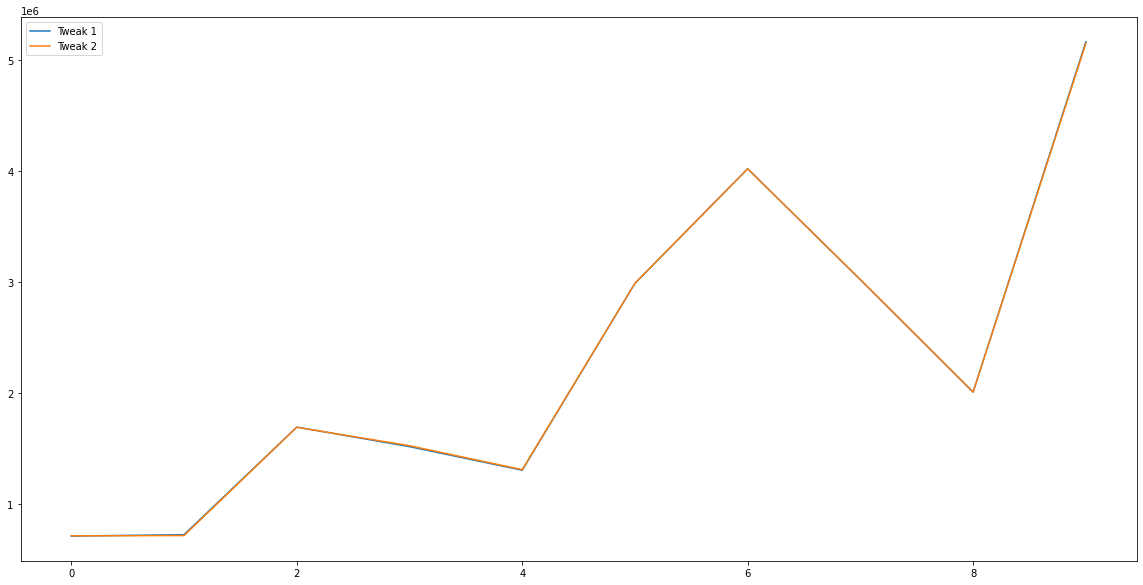

In [10]:
plt.figure(figsize=(20,10))
plt.plot(np_1, label='Tweak 1')
plt.plot(np_2, label='Tweak 2')
plt.legend()
plt.show()

## Diferença entre N

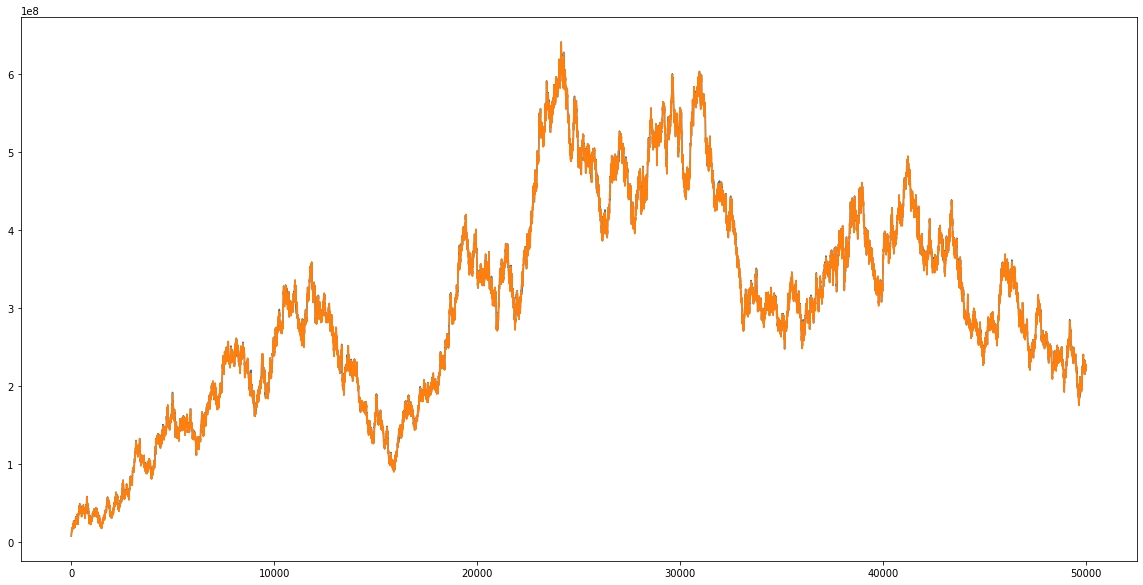

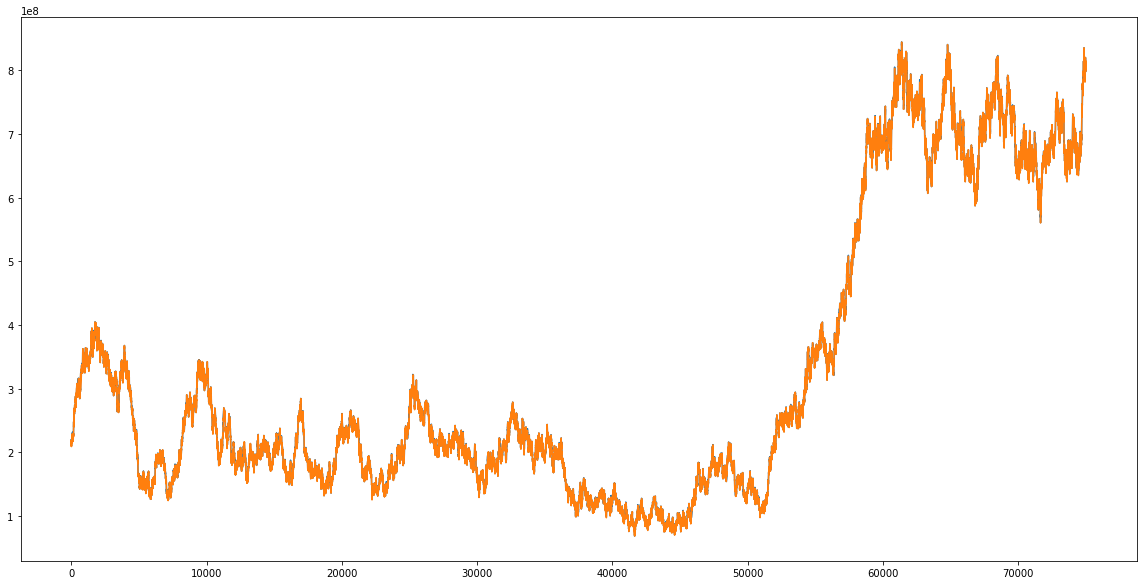

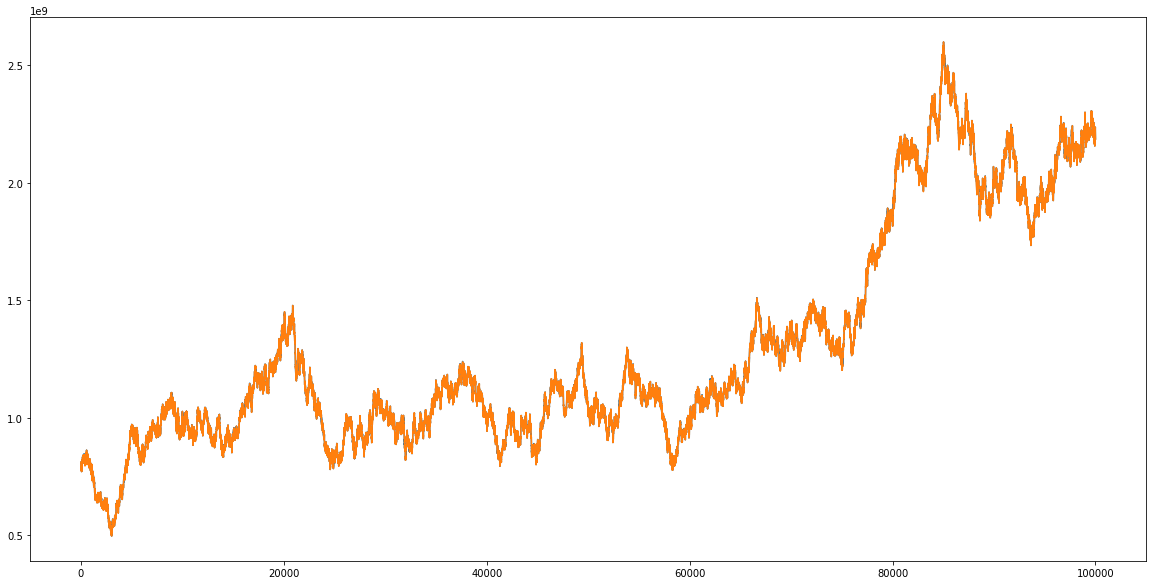

In [11]:
plt.figure(figsize=(20,10))
plt.plot(cq_1_n_1)
plt.plot(cq_2_n_1)
plt.show()

plt.figure(figsize=(20,10))
plt.plot(cq_1_n_2)
plt.plot(cq_2_n_2)
plt.show()

plt.figure(figsize=(20,10))
plt.plot(cq_1_n_3)
plt.plot(cq_2_n_3)
plt.show()

## Diferença entre R

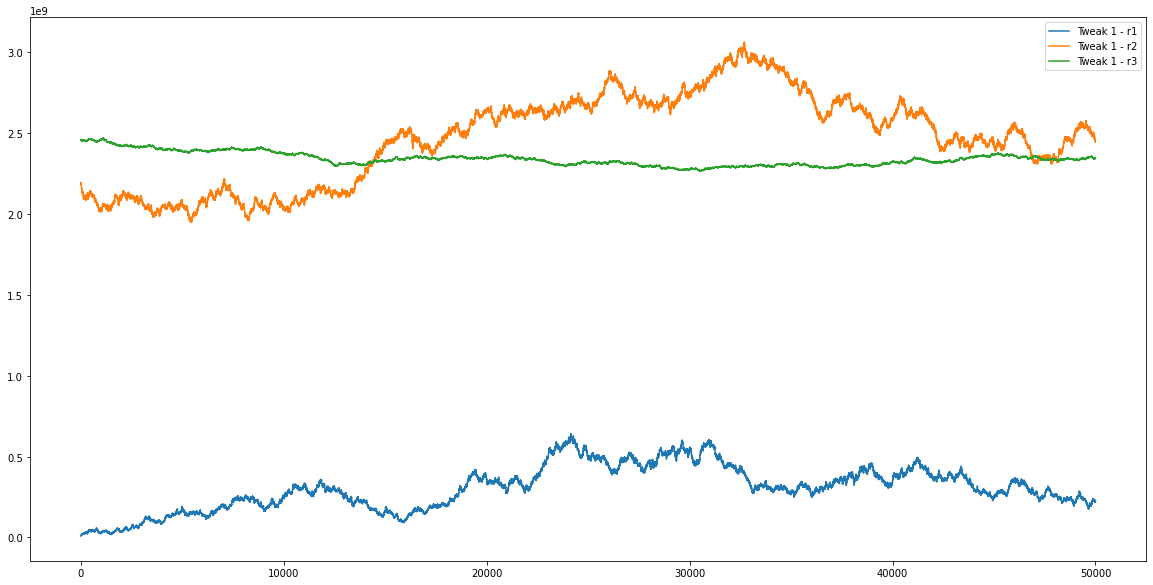

In [12]:
plt.figure(figsize=(20,10))
plt.plot(cq_1_n_1, label='Tweak 1 - r1')
plt.plot(cq_1_r_1, label='Tweak 1 - r2')
plt.plot(cq_1_r_2, label='Tweak 1 - r3')
plt.legend()
plt.show()

## Diferença entre P

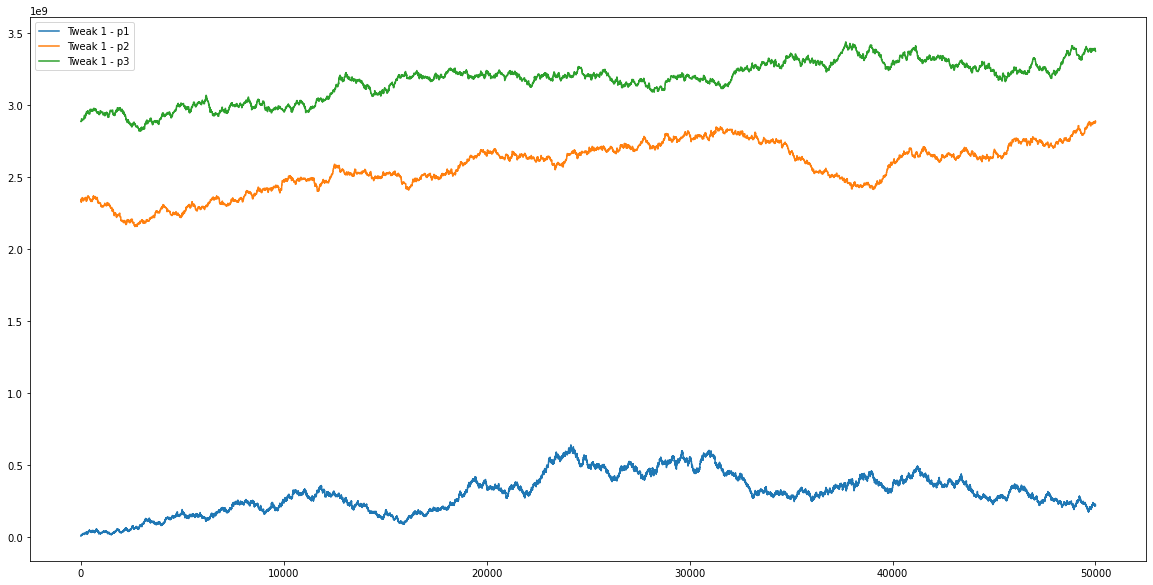

In [13]:
plt.figure(figsize=(20,10))
plt.plot(cq_1_n_1, label='Tweak 1 - p1')
plt.plot(cq_1_p_1, label='Tweak 1 - p2')
plt.plot(cq_1_p_2, label='Tweak 1 - p3')
plt.legend()
plt.show()

## Diferença entre P e R



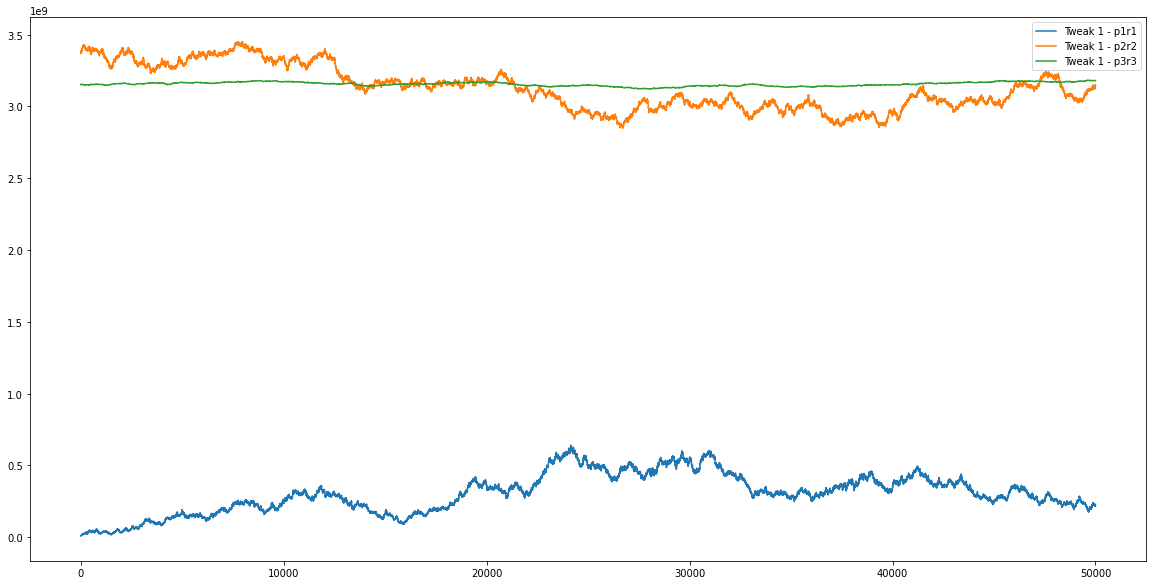

In [15]:
plt.figure(figsize=(20,10))
plt.plot(cq_1_n_1, label='Tweak 1 - p1r1')
plt.plot(cq_1_pr_1, label='Tweak 1 - p2r2')
plt.plot(cq_1_pr_2, label='Tweak 1 - p3r3')
plt.legend()
plt.show()